Copyright (C) 2021 FeatSet+  

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
 
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# Multi-attribute analysis

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from skimage import io

## Input paths and files

In [2]:
# Path to ds-Awa
path = 'featset+_csv/ds-AwA'

features = pd.read_csv(path + '_CL.csv', sep=',')
# Ignore first column (OID)
features.drop(['OID'], axis=1, inplace=True)
    
imgnames = pd.read_csv(path + '.csv', sep=',')

# ===============================
# WARNING: the following files are available in the original ds-AwA dataset.
# Please, download them in the dataset website.
# ===============================
# Path to the images of the original ds-AwA dataset
imgpath = 'AwA2-data/Animals_with_Attributes2/'

# Predicates file available in the ds-AwA dataset
pred = pd.read_csv('util/predicates.txt', sep='\t', header=None)
pred.columns=['predID', 'predicate']

# Classes file available in the ds-AwA dataset
classes = pd.read_csv('util/classes.txt', header=None, sep="\t")
classes.columns=['id', 'class']

# pmc = pd.read_csv('util/predicate-matrix-continuous.txt', sep='  ', header=None)
pmb = pd.read_csv('util/predicate-matrix-binary.txt', sep=' ', header=None)
# ===============================

## Define kNN query

In [3]:
def getknn(sq, k, dataset):
    distances = pd.DataFrame(columns=['si', 'siID', 'distance'])
    
    for i, idx in enumerate(dataset.index):
        dist = distance.minkowski(sq, dataset.loc[idx], p=2)
        distances.loc[len(distances)] = [dataset.loc[idx], idx, dist]
    
    # Filter k nearest elements (with lowest distances)
    return distances.sort_values(by='distance', ascending=True).reset_index()[:k]

## Filter images by predicate

In [4]:
# Filter by predicate "bipedal"
predID = pmb[pred[pred['predicate'] == 'bipedal']['predID'].values[0]]
indClassPredicate = pmb[pmb.columns[predID] == 0].index[:]

print('Indexes of classes containing the selected predicate', indClassPredicate)

filteredObjects = pd.DataFrame(columns=imgnames.columns)

# Filter the classes from the dataset
for i,_ in enumerate(indClassPredicate):
    classValue = classes['class'].iloc[indClassPredicate[i]].replace('+','_')
    
    slicedf = imgnames[imgnames['class'] == classValue]
    filteredObjects = pd.concat([filteredObjects, slicedf])

filteredObjects.reset_index(inplace=True)

# Print filtered objects
display('Filtered objects:', filteredObjects)

Indexes of classes containing the selected predicate Int64Index([2, 8, 17, 23, 29, 46, 49], dtype='int64')


'Filtered objects:'

,index,OID,filename,class
0,11597,11597,JPEGImages/killer+whale/killer+whale_10108.jpg,killer_whale
1,11598,11598,JPEGImages/killer+whale/killer+whale_10003.jpg,killer_whale
2,11599,11599,JPEGImages/killer+whale/killer+whale_10009.jpg,killer_whale
3,11600,11600,JPEGImages/killer+whale/killer+whale_10262.jpg,killer_whale
4,11601,11601,JPEGImages/killer+whale/killer+whale_10265.jpg,killer_whale
...,...,...,...,...
3701,37317,37317,JPEGImages/dolphin/dolphin_10462.jpg,dolphin
3702,37318,37318,JPEGImages/dolphin/dolphin_10324.jpg,dolphin
3703,37319,37319,JPEGImages/dolphin/dolphin_10741.jpg,dolphin
3704,37320,37320,JPEGImages/dolphin/dolphin_10511.jpg,dolphin


## Query nearest images among those filtered by the predicate

,index,si,siID,distance
0,4,feature_0 0.098039 feature_1 0.407843 ...,11601,0.000000
1,3072,feature_0 0.117647 feature_1 0.458824 ...,36688,0.288575
2,692,feature_0 0.090196 feature_1 0.447059 ...,16270,0.397048
3,3210,feature_0 0.086275 feature_1 0.568627 ...,36826,0.407391
4,3248,feature_0 0.109804 feature_1 0.443137 ...,36864,0.408427
5,2831,feature_0 0.125490 feature_1 0.415686 ...,36447,0.410867
6,3576,feature_0 0.105882 feature_1 0.541176 ...,37192,0.416277
7,2379,feature_0 0.027451 feature_1 0.458824 ...,20983,0.419810


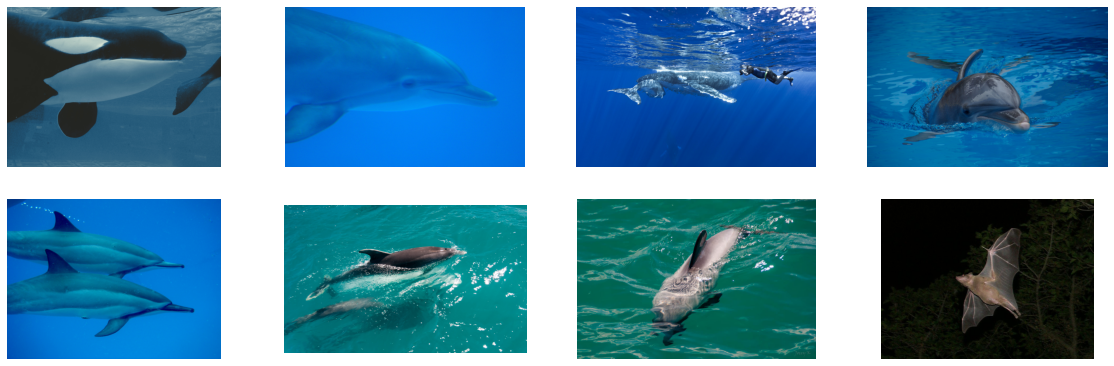

In [7]:
# Query object
sqID = 11601

knn = getknn(features.iloc[sqID], k=8, dataset=features.loc[filteredObjects['index'].values])
display(knn)

plt.figure(figsize=[20, 10])
for i, idImg in enumerate(knn['siID']):
    
    plt.subplot(3, 4, i+1)
    
    # Print image path
    # print(idImg, imgpath + str(imgnames['filename'].iloc[idImg]))
    
    image = io.imread(imgpath + str(imgnames['filename'].iloc[idImg]), as_gray=False)
    
    plt.imshow(image)
    plt.grid('off')
    plt.axis('off')

plt.show()

,index,si,siID,distance
0,3701,feature_0 0.215686 feature_1 0.674510 ...,37317,0.000000
1,2290,feature_0 0.184314 feature_1 0.666667 ...,20894,0.189538
2,2801,feature_0 0.227451 feature_1 0.639216 ...,36417,0.213501
3,2542,feature_0 0.196078 feature_1 0.607843 ...,21146,0.231306
4,3223,feature_0 0.117647 feature_1 0.686275 ...,36839,0.233588


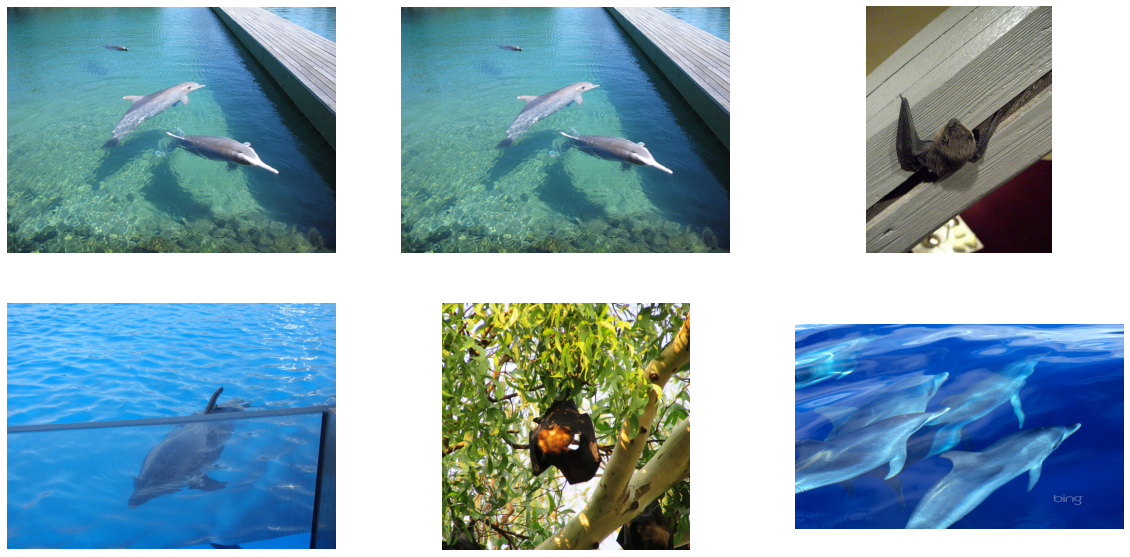

In [6]:
# Query object
sqID = 37317

knn = getknn(features.loc[sqID], k=5, dataset=features.loc[filteredObjects['index'].values])
display(knn)

plt.figure(figsize=[20, 10])

# Start showing the query image
plt.subplot(2, 3, 1)
image = io.imread(imgpath + str(imgnames['filename'].iloc[sqID]), as_gray=False)
plt.imshow(image)
plt.grid('off')
plt.axis('off')

for i, idImg in enumerate(knn['siID']):
    plt.subplot(2, 3, i+2)
    image = io.imread(imgpath + str(imgnames['filename'].iloc[idImg]), as_gray=False)
    plt.imshow(image)
    plt.grid('off')
    plt.axis('off')

plt.show()